<font size ="8"> <div align="center">**Understanding Gender Wage Gap using ML Regression**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

---------------
# **Context of the Exercise (Gender Wage Gap)**
---------------

Here we ask and answer the following question:

**What is the difference in predicted wages between men and women with the same job-relevant characteristics?**

<p align = "justify">
Our data comes from the March Supplement of the U.S. Current Population Survey, year 2012. We focus on the single (never married) workers with education levels equal to high-school, some college, or college graduates. The sample size is about 4,000.

Our outcome variable Y is hourly wage, and our X’s are various characteristics of workers such as gender, experience, education, and geographical indicators.

-----------------------------
## **Data Description:**
-----------------------------
The dataset contains the following variables:
1. `wage`   : weekly wage
2. `female` : female dummy
3. `cg`     : college Graduate Dummy
4. `sc`     : some college dummy
5. `hsg`    : High School graduate dummy
6. `mw`     : mid-west dummy
7. `so`     : south dummy
8. `we`     : west dummy
9. `ne`     : northeast dummy
10. `exp1`   : experience(year)
11. `exp2`   : experience squared (taken as experience squared/100)
12. `exp3`   : experience cubed (taken as experience cubed/1000)

### **Importing the necessary libraries and overview of the dataset**

**Importing Libraries**

In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Mounting Google Drive and Loading the data**

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# Load data
df = pd.read_csv('gender_wage_gap.csv')

**Quick look at the Data**

In [ ]:
# See variables in the dataset
df.head()

,female,cg,sc,hsg,mw,so,we,ne,exp1,exp2,exp3,wage
0,0,0,0,1,0,0,0,1,33.0,10.89,35.937,11.659091
1,0,1,0,0,0,0,0,1,27.0,7.29,19.683,12.825000
2,0,0,1,0,0,0,0,1,13.0,1.69,2.197,5.777027
3,0,1,0,0,0,0,0,1,2.0,0.04,0.008,12.468750
4,1,1,0,0,0,0,0,1,15.0,2.25,3.375,18.525000


* From the table above, it is seen that the first 8 columns are encoded categorical data
* on the other hand, the `exp2`, and `exp3` columns are obtained from `exp1` column

**Understanding the shape of the data and its datatypes**

In [ ]:
# Viewing the number of rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

In [ ]:
# Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835 entries, 0 to 3834
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   female  3835 non-null   int64  
 1   cg      3835 non-null   int64  
 2   sc      3835 non-null   int64  
 3   hsg     3835 non-null   int64  
 4   mw      3835 non-null   int64  
 5   so      3835 non-null   int64  
 6   we      3835 non-null   int64  
 7   ne      3835 non-null   int64  
 8   exp1    3835 non-null   float64
 9   exp2    3835 non-null   float64
 10  exp3    3835 non-null   float64
 11  wage    3835 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 359.7 KB


**Observations:**
- The dataset has 3835 observations and 12 different variables.
- There is no missing value in the dataset.
- All of the dummy variables (cg, sc, hsg, etc.) have the datatype as int. They are binary variables having values of 0 and 1.

### **Exploratory Data Analysis**

> **Checking the summary statistics of the dataset**

In [ ]:
# Printing the summary statistics for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
female,3835.0,0.417992,0.493293,0.000000,0.00000,0.000000,1.000000,1.000000
cg,3835.0,0.376271,0.484513,0.000000,0.00000,0.000000,1.000000,1.000000
sc,3835.0,0.323859,0.468008,0.000000,0.00000,0.000000,1.000000,1.000000
hsg,3835.0,0.299870,0.458260,0.000000,0.00000,0.000000,1.000000,1.000000
mw,3835.0,0.287614,0.452709,0.000000,0.00000,0.000000,1.000000,1.000000
so,3835.0,0.243546,0.429278,0.000000,0.00000,0.000000,0.000000,1.000000
we,3835.0,0.211734,0.408591,0.000000,0.00000,0.000000,0.000000,1.000000
ne,3835.0,0.257106,0.437095,0.000000,0.00000,0.000000,1.000000,1.000000
exp1,3835.0,13.353194,8.639348,2.000000,6.00000,11.000000,19.500000,35.000000
exp2,3835.0,2.529267,2.910554,0.040000,0.36000,1.210000,3.802500,12.250000


**Observations:**
- The average wage is about 15 dollars per hour while the maximum wage is 348, which is very high.
- 42% of workers are women.
- The average experience is 13 years, with the minimum and maximum being 2 and 35 years, respectively, indicating that the data is diversified and drawn from various experience groups.
- 38% of the people in the data are college graduates.
- 32% have gone to some college, and 30% hold only high school diploma.
- You can also see geographical distribution of workers across major geographical regions of the states, and seem to be nearly same between 22-28%, which again shows maybe data is collected from different regions in a uniform manner.

> **Looking at Distributions of `wage` and `exp` columns**

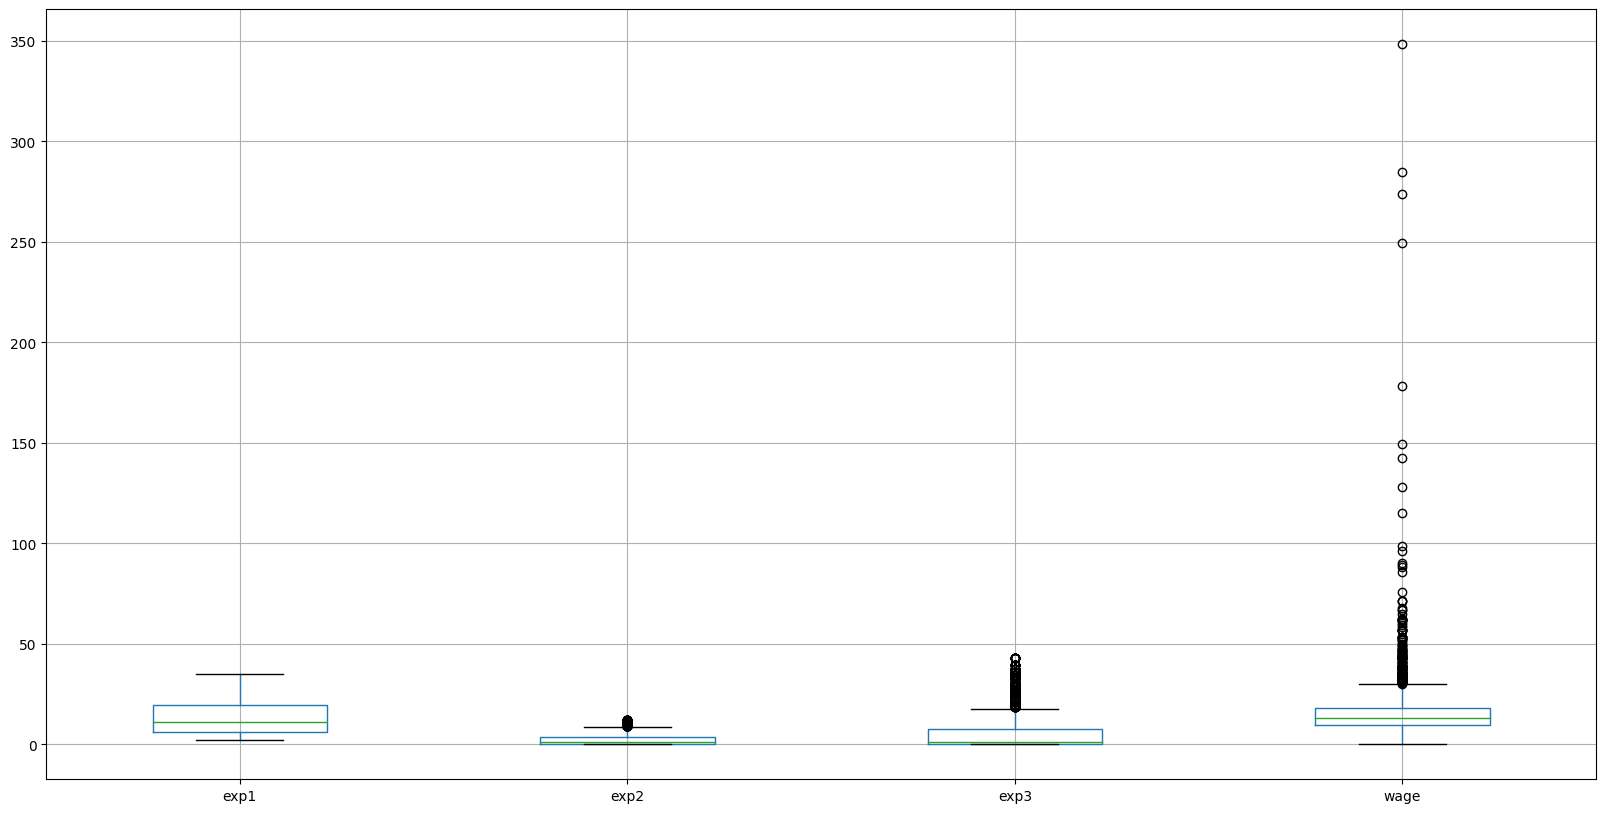

In [ ]:
# Plotting boxplot of Wage and Experience Columns
sns.boxplot(data = df[['exp1','exp2','exp3','wage']])

- For the wage variable, we can see that there are outliers, which makes sense, because some people have higher earnings than others.

> **Looking at the statistics of all columns for both female and male**

In [ ]:
# Mean value of all females
df[df['female'] == 1].mean()

female     1.000000
cg         0.406114
sc         0.354336
hsg        0.239551
mw         0.291329
so         0.255147
we         0.198378
ne         0.255147
exp1      13.037118
exp2       2.449453
exp3       5.599297
wage      14.720058
dtype: float64

In [ ]:
# Mean value of all males
df[df['female'] == 0].mean()

female     0.000000
cg         0.354839
sc         0.301971
hsg        0.343190
mw         0.284946
so         0.235215
we         0.221326
ne         0.258513
exp1      13.580197
exp2       2.586588
exp3       5.964938
wage      16.117458
dtype: float64

**Observations:**
- We first take a look at the following descriptive statistics for the subsamples of single men and single women, with educational attainment equal to high-school, some college, or college.
- The mean hourly wage is 16 dollars for men and about 15 dollars for women, so the difference is 1, without controlling for job-relevant characteristics.
- If we take a look at some of these characteristics, we see that on average men have more experience, but women are more likely to have college degrees or some college education.
- Geographical distribution of both men and women is similar.

### **Training Machine Learning Models**

#### **Basic Model**

In [ ]:
# Wage linear regression
import statsmodels.api as sm
Y = df['wage'] # target variable
X = df[['female' , 'sc', 'cg', 'mw' , 'so' , 'we' , 'exp1' , 'exp2' , 'exp3']] #regressors
X = sm.add_constant(X) # adding constant for intercept
model = sm.OLS(Y, X)
results = model.fit() # train the model
print(results.summary()) # summary of the model

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     44.87
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           3.17e-77
Time:                        17:07:11   Log-Likelihood:                -15235.
No. Observations:                3835   AIC:                         3.049e+04
Df Residuals:                    3825   BIC:                         3.055e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9154      1.299      3.784      0.0

**Observations:**
- Model performance is very poor as the r squared is very low.
- We can see that cg graduate have high coefficient which signifies that graduated people are getting high wages.
- On the other hand exp2 has a negative coefficient which means for exp2 the wages are less.
- Coefficient of the female indicator is negative, signifies that females are getting lower wages.

#### **Flexible model**

In [ ]:
# import PolynomialFeatures library to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

# create an object of PolynomialFeatures with only the interaction terms
poly = PolynomialFeatures(interaction_only=True,include_bias = False)

#Dropping constant and female as we dont want to create interaction features for them
X.drop(['const','female'],axis = 1,inplace = True)
print(X.shape)

# transform the data to add the polynomial features too
X_poly = poly.fit_transform(X)

# convert to dataframe
X_poly = pd.DataFrame(X_poly,columns= poly.get_feature_names_out(X.columns))

print(X_poly.shape)
X_poly['female'] = df['female']
X['female'] = df['female']
X_poly = sm.add_constant(X_poly)

#defining the model
model = sm.OLS(Y, X_poly) # Linear regression/OLS object

#fitting the model
results = model.fit() # train the model

# summary of the model
print(results.summary())

(3835, 8)
(3835, 36)
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     13.79
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           5.53e-69
Time:                        17:07:11   Log-Likelihood:                -15217.
No. Observations:                3835   AIC:                         3.050e+04
Df Residuals:                    3802   BIC:                         3.071e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5524      7.17

**Observations:**
- R2 have improved very slightly.
- Coefficient of cg*exp is quite high, represents Experience variable times the indicator of having a college degree will have a high wage, or people with good education and good experience are paid good.
- Coefficient of cg*mw is negative which implies College graduate from mid west are not getting paid good, which is not a good sign as for the people living in mid west as from the basic model we know that the college graduates are getting paid well.
- Coefficient of cg * *sc*, so * we, mw * *we*, *mw* * so, is almost 0 and does not make any contribution to the model.

We estimate the linear regression model:

Y = $β_1D$ + $β^r_2W$ + ε.

1. D is the indicator of being a female (1 if female and 0 otherwise). W ’s are controls.
2. Basic model: W ’s consist of education and regional indicators, experience, experience squared, and experience cubed.
3. Flexible model: W ’s consist of controls in the basic model plus all of their two-way interactions.

|| Estimate | Standard Error | Confidence Interval|
| --- | --- | --- | --- |
| basic reg | -1.8264 | 0.425 | [-2.659  -0.994] |
| flexi reg | -1.8800 | 0.425 | [-2.713  -1.047] |

- In the above table we see the estimated regression coefficient, its standard error, and the 95% confidence interval, for both the basic and flexible regression model.

- The results for basic and flexible regression models are in a very close agreement.

- The estimated gender gap in hourly wage is about −2 dollars. This means that women get paid 2 dollars less per hour on average than men, controlling for experience, education, and geographical region.

- The 95% confidence interval ranges from −2.7 to −1 dollars and -2 is lying within the region of the confidence interval and therefore we can conclude that the difference in the hourly wage for men and women, who have the same recorded characteristics, is both statistically and economically significant.

### **Training ML models while employing Partialling-out**

#### **Illustration of Partialling Out: (Linear Specification - Basic Model)**

**“Partialling-out” is an important tool that provides a conceptual understanding of the regression coefficient β1.  
The Steps for partialling out are:**
1. We predict Y using W only and find its residuals. i.e. removing the dependence of W on Y.
2. We predict D using W and find its residuals, i.e. removing the dependence of W on D.
3. Then we model residuals from step 1 and step 2, and this will give us how Y is dependent on D only.

**Step 1: We predict Y using W only and find its residuals. i.e. removing the dependence of W on Y.**

In [ ]:
# target variable
Y = df['wage']

#regressors W
W = df[['sc', 'cg', 'mw' , 'so' , 'we' , 'exp1' , 'exp2' , 'exp3']]
W = sm.add_constant(W)

# Linear regression/OLS object
model = sm.OLS(Y, W)

# train the model
results = model.fit()

# get the residuals
t_Y = results.resid
t_Y

0       -1.686401
1      -10.550023
2       -9.298414
3       -3.466715
4       -4.451256
          ...    
3830     1.148402
3831    -0.049341
3832     2.728471
3833    -5.471606
3834    30.261356
Length: 3835, dtype: float64

**Step 2: We predict D using W and find its residuals, i.e. removing the dependence of W on D.**

In [ ]:
# target regressor D, i.e. female in our predicitng wage example
D = df['female']

#regressors W
W = df[['sc', 'cg', 'mw' , 'so' , 'we' , 'exp1' , 'exp2' , 'exp3']] #regressors
W = sm.add_constant(W)

# Linear regression/OLS object
model = sm.OLS(D, W)

# train the model
results = model.fit()

# get the residuals
t_D = results.resid
t_D

0      -0.323196
1      -0.448263
2      -0.443029
3      -0.485547
4       0.572763
          ...   
3830    0.555462
3831   -0.294333
3832    0.577249
3833    0.575515
3834   -0.419835
Length: 3835, dtype: float64

**Step 3: Then we model residuals from step 1 and step 2, and this will give us how Y is dependent on D only.**

In [ ]:
# Run OLS coefficient get coefficients and 95% confidence intervals

# target variable
Y = t_Y

X = t_D
X = sm.add_constant(X)

# Linear regression/OLS object
model = sm.OLS(Y, X)

# train the model
results = model.fit()

# print the summary of the trained model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     18.55
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.70e-05
Time:                        17:07:11   Log-Likelihood:                -15235.
No. Observations:                3835   AIC:                         3.047e+04
Df Residuals:                    3833   BIC:                         3.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.281e-15      0.208  -2.54e-14      1.0

#### **Illustration of Partialling Out: (Quadratic Specification - Flexible model)**

In [ ]:
# target variable
Y = df['wage']

#regressors W
W = df[['sc', 'cg', 'mw' , 'so' , 'we' , 'exp1' , 'exp2' , 'exp3']]

# create an object of PolynomialFeatures with only the interaction terms
poly = PolynomialFeatures(interaction_only=True,include_bias = False)

# transform the data to add the polynomial features too
X_poly = poly.fit_transform(W)
X_poly = sm.add_constant(X_poly)

#defining the model
model = sm.OLS(Y, X_poly) # Linear regression/OLS object

 # train the model
results = model.fit()

# get the residuals
t_Y = results.resid
t_Y

0       -2.269388
1      -11.721164
2       -8.577609
3       -4.626069
4       -4.974672
          ...    
3830     1.726182
3831     0.775800
3832     3.639956
3833    -4.183105
3834    31.101298
Length: 3835, dtype: float64

In [ ]:
# target regressor
D = df['female']

#Regressors w
W = df[['sc', 'cg', 'mw' , 'so' , 'we' , 'exp1' , 'exp2' , 'exp3']]

# create an object of PolynomialFeatures with only the interaction terms
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_poly = poly.fit_transform(W)
X_poly = sm.add_constant(X_poly)


#defining the model
model = sm.OLS(D, X_poly)

# train the model
results = model.fit()

# get the residuals
t_D = results.resid
t_D

0      -0.255420
1      -0.443778
2      -0.408862
3      -0.576250
4       0.576618
          ...   
3830    0.539392
3831   -0.267692
3832    0.551484
3833    0.588884
3834   -0.405553
Length: 3835, dtype: float64

In [ ]:
# Run OLS coefficient get coefficients and 95% confidence intervals
Y = t_Y # target variable
X = t_D
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit() # train the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     19.75
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           9.07e-06
Time:                        17:07:11   Log-Likelihood:                -15217.
No. Observations:                3835   AIC:                         3.044e+04
Df Residuals:                    3833   BIC:                         3.045e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.721e-13      0.207  -8.33e-13      1.0

|| Estimate | Standard Error |
| --- | --- | --- |
| basic reg | -1.8264 | 0.425 |
| flexi reg | -1.8800 | 0.425 |
| basic reg with partialling out| -1.8264 | 0.424 |
| flexi reg with partialling out| -1.8800 | 0.423 |

### **Conclusion:**
- The gender wage gap may partly reflect genuine discrimination against women in the labor market.
- It may also partly reflect the so-called selection effect, namely that women are more likely to end up in occupations that pay somewhat less (for example, school teachers).